In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def passAng(x,V,d2,L,l1,l2,g,E,beta,q=1):
    Lt = L + l1 + l2
    delP = q*V*L*(L + 2*l2)/(4*g*beta**2*E*Lt)
    return(d2/Lt - x/Lt - delP)

In [3]:
#pixe parameters
g = 7.4e-3
d1 = 2e-4
d2 = 6.5e-4
L = 95.8e-3
l1 = 17e-3
l2 = 5e-3

#proton parameters
pMass = 9.38272089e8 #proton mass in eV
T = 5e4 #kinetic energy in eV

#relatavistic parameters
pGamma = 1 + T/pMass
pBeta = np.sqrt(1 - pGamma**-2)
pE = pMass + T

In [4]:
x = np.linspace(-d1/2,d1/2,2)
xpmax = passAng(x,0e3,d2/2,L,l1,l2,g,pE,pBeta)
xpmin = passAng(x,0e3,-d2/2,L,l1,l2,g,pE,pBeta)

x = x*1e3
xpmax = xpmax*1e3
xpmin = xpmin*1e3

Text(0, 0.5, 'Incoming Angle [mrad]')

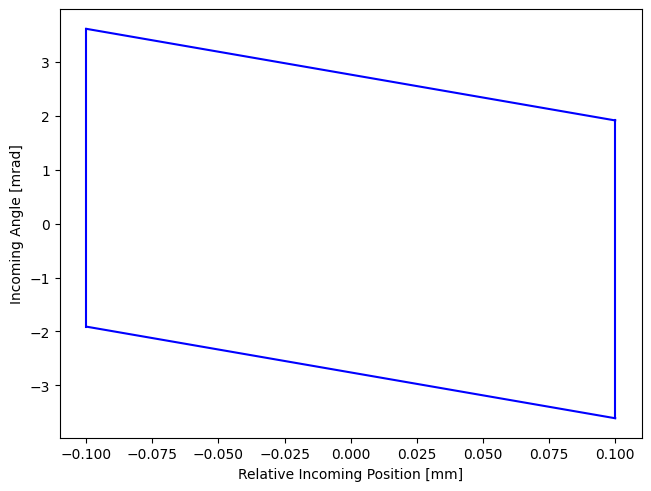

In [5]:
fig,ax = plt.subplots(layout="constrained")

ax.plot(x,xpmax,c="b")
ax.plot(x,xpmin,c="b")
ax.plot([x[0],x[0]],[xpmin[0],xpmax[0]],c="b")
ax.plot([x[1],x[1]],[xpmin[1],xpmax[1]],c="b")
ax.set_xlabel("Relative Incoming Position [mm]")
ax.set_ylabel("Incoming Angle [mrad]")
#plt.savefig("passSpace.svg",format="svg")

In [6]:
def xBallistic(s,x_o,ang_o,Eo,gamma,beta,g,V,q=1):
    c = 299792458
    p1 = q*V/(Eo*g*beta**2)
    p2 = gamma*ang_o
    return(p1*s**2 + p2*s + x_o)

def vertLim(ang,lim,Eo,gamma,beta,g,V,q=1):
    nom = g*beta**2*gamma**2*Eo*ang**2
    denom = 4*q*V
    return(lim + nom/denom)

def ballisticLim(x,lim,Eo,gamma,beta,g,V,q=1):
    nom = 4*q*V*(x - lim)
    denom = g*beta**2*gamma**2*Eo
    return(np.sqrt(nom/denom),-np.sqrt(nom/denom))

def overboardLim(x,Eo,gamma,beta,ge,V,L,go,
                 l1=0,l2=0,a1=0,a2=0,d1=0,d2=0,q=0):
    V = abs(V)
    
    xp_a1_p = (d1/2-x)/(gamma*a1)
    xp_a1_m = (-d1/2-x)/(gamma*a1)

    xp_s_p = np.sqrt(4*q*(-V)*(x - go/2)/(ge*beta**2*gamma**2*Eo))
    xp_s_m = -np.sqrt(4*q*(V)*(x + go/2)/(ge*beta**2*gamma**2*Eo))

    xp_l2_p = 0 #more algebra

Text(0.5, 0, 'Angle [rad]')

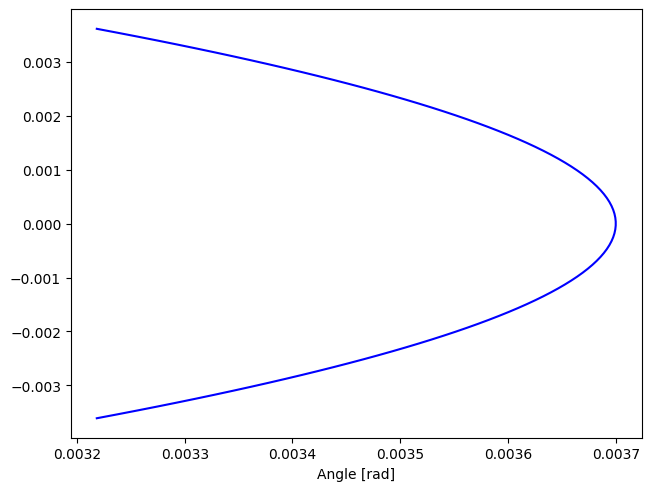

In [12]:
xGapMaxP,xGapMaxM = ballisticLim(x*1e-3,g/2,pMass,pGamma,pBeta,g,-500)

ang = np.linspace(xpmin[-1]*1e-3,xpmax[0]*1e-3,100)
gapMax = vertLim(ang,g/2,pMass,pGamma,pBeta,g,-5)
gapMin = vertLim(ang,-g/2,pMass,pGamma,pBeta,g,5)

fig,ax = plt.subplots(layout="constrained")

ax.plot(gapMax,ang,c="b")
ax.set_xlabel("Relative Incoming Position [mm]")
ax.set_ylabel("Incoming Angle [mrad]")

In [8]:
iniAng = 100e-3
iniV = -800
lenArr = np.linspace(0,L,100)

traj = xBallistic(lenArr,0,iniAng,pMass,pGamma,pBeta,g,iniV)

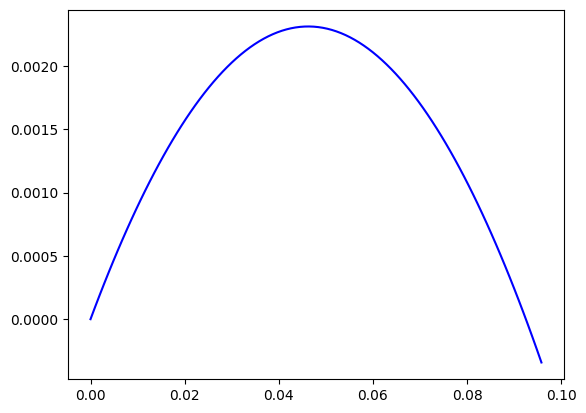

In [9]:
plt.plot(lenArr,traj,c="b")

In [10]:
xpThin = -iniV*L*(L+2*l2)/(2*g*pBeta**2*pE*(L+l2+l1))
xpBallistic = -iniV*L*(L+l2)/(g*pBeta**2*pE*(L+l2+l1))

xl1Thin = pGamma*l1*xpThin
xl1Ballistic = pGamma*l1*xpBallistic

trajThin = xBallistic(lenArr,xl1Thin,xpThin,pMass,pGamma,pBeta,g,iniV)
trajBallistic = xBallistic(lenArr,xl1Ballistic,xpBallistic,pMass,pGamma,pBeta,g,iniV)

xpLThin = iniV*L/(g*pBeta**2*pGamma*pMass) + xpThin
xpLBallistic = iniV*L/(g*pBeta**2*pGamma*pMass) + xpBallistic
print(xpLThin)

xoutThin = pGamma*l2*xpLThin + trajThin[-1]
xoutBallistic = pGamma*l2*xpLBallistic + trajBallistic[-1]

plotLen = np.concatenate(([0],lenArr + l1,[l1+L+l2]))

fullThin = np.concatenate(([0],trajThin,[xoutThin]))
fullBallistic = np.concatenate(([0],trajBallistic,[xoutBallistic]))

-0.057060392392256666


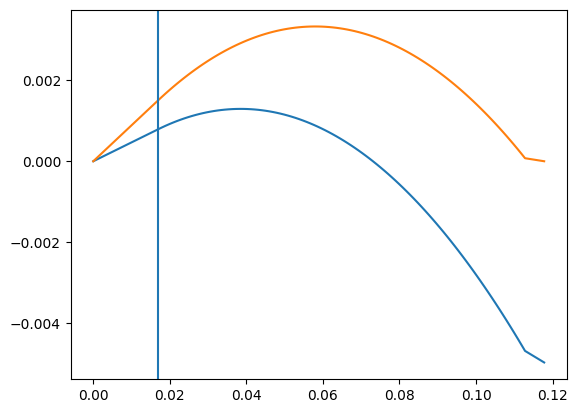

In [11]:
plt.plot(plotLen,fullThin)
plt.plot(plotLen,fullBallistic)
plt.axvline(l1)